In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop('Serial No.',axis=1)

In [7]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
x_train.shape , y_train.shape

((400, 7), (400,))

In [11]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model= Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

2022-06-29 18:05:38.753141: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [15]:
history = model.fit(x_train,y_train,epochs=250,validation_split=0.2)

2022-06-29 18:05:39.014013: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
10/10 [==============================] - 1s 23ms/step - loss: 0.9082 - val_loss: 0.7257
Epoch 2/250
10/10 [==============================] - 0s 5ms/step - loss: 0.5551 - val_loss: 0.3841
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 0.2923 - val_loss: 0.1708
Epoch 4/250
10/10 [==============================] - 0s 6ms/step - loss: 0.1351 - val_loss: 0.0691
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0643 - val_loss: 0.0383
Epoch 6/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0420 - val_loss: 0.0372
Epoch 7/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0406
Epoch 8/250
10/10 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0405
Epoch 9/250
10/10 [==============================] - 0s 9ms/step - loss: 0.0368 - val_loss: 0.0381
Epoch 10/250
10/10 [==============================] - 0s 12ms/step - loss: 0.0354 - val_loss: 0.0358
Epoch 1

In [16]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8272789966471111

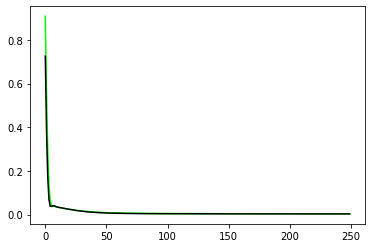

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='lime')
plt.plot(history.history['val_loss'],color='black')